In [ ]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Embedding, SimpleRNN, RNN, LSTM, GRU, Input, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import string

In [ ]:
Lyrics90= open('/content/sample_data/90년대.txt')
Lyrics90 = Lyrics90.read()
Lyrics90

FileNotFoundError: ignored

In [ ]:
##토크나이저 모듈 정의
tk=Tokenizer()

In [ ]:
#가사를 기반으로 단어 색인 사전을 만드는 fit_on_texts() 메서드를 호출
tk.fit_on_texts(Lyrics90.split('\n'))

In [ ]:
tk.word_index

{'내': 1,
 'you': 2,
 '널': 3,
 '난': 4,
 '수': 5,
 '나': 6,
 '너를': 7,
 '너의': 8,
 'i': 9,
 '그': 10,
 'me': 11,
 '나를': 12,
 '내가': 13,
 '날': 14,
 '내게': 15,
 '없어': 16,
 'love': 17,
 '나의': 18,
 '너': 19,
 '이제': 20,
 '바래': 21,
 '니가': 22,
 '더': 23,
 '다': 24,
 "i'm": 25,
 '이': 26,
 '이젠': 27,
 '사랑을': 28,
 '없는': 29,
 'getup': 30,
 '사랑': 31,
 '니': 32,
 '다시': 33,
 '우리': 34,
 'the': 35,
 '넌': 36,
 '왜': 37,
 '그대': 38,
 'oh': 39,
 '있는': 40,
 '너무': 41,
 '걸': 42,
 '정말': 43,
 '모두': 44,
 'and': 45,
 '그렇게': 46,
 '나는': 47,
 '거야': 48,
 '또': 49,
 '하지만': 50,
 'to': 51,
 'come': 52,
 'so': 53,
 '언제나': 54,
 'a': 55,
 'back': 56,
 '사랑해': 57,
 '제발': 58,
 '지금': 59,
 '네가': 60,
 '나도': 61,
 'yeah': 62,
 'it': 63,
 '있어': 64,
 '그대를': 65,
 '함께': 66,
 'my': 67,
 '이렇게': 68,
 'feel': 69,
 'on': 70,
 'be': 71,
 '모든': 72,
 '봐': 73,
 'can': 74,
 'your': 75,
 'call': 76,
 '마지막': 77,
 'baby': 78,
 '너와': 79,
 '얼마나': 80,
 '너에게': 81,
 'get': 82,
 '없이': 83,
 '모든걸': 84,
 '영원히': 85,
 'in': 86,
 'gonna': 87,
 '다른': 88,
 '항상': 89,
 'sorry':

In [ ]:
#토크나이저의 texts_to_sequences() 메서드를 사용하여 가사를 시퀀스로 변환
Lyrics_seq=tk.texts_to_sequences(Lyrics90.split('\n'))

In [ ]:
Lyrics_seq

[[19, 12, 184, 354, 629, 630],
 [125, 208, 41, 208, 28],
 [631, 32, 355, 12, 632, 5, 16],
 [1676, 13, 293, 442],
 [],
 [971, 7, 972],
 [125, 1677, 1678, 1679],
 [633, 36, 32, 443, 44, 1680],
 [19, 247, 634, 635, 13, 1681],
 [],
 [24, 973, 7, 974, 1, 636],
 [444, 975, 1, 637, 976],
 [977, 978, 19, 445, 979],
 [19, 168, 209, 106, 638],
 [],
 [971, 7, 1682],
 [248, 1683, 980, 24, 1684],
 [1685, 12, 1686, 981, 1687],
 [32, 1688, 1689, 12, 1690],
 [],
 [24, 973, 7, 974, 1, 636],
 [444, 975, 1, 637, 976],
 [977, 978, 19, 445, 979],
 [19, 168, 209, 106, 638],
 [112, 17, 126, 639],
 [51, 185, 67, 1691, 1692, 52, 294],
 [1693, 1694, 55, 1695, 1696, 67, 1697],
 [45, 25, 53, 1698, 446, 17, 1699],
 [112, 9, 1700, 1701, 17, 640, 1702, 446, 1703],
 [356],
 [],
 [982, 447, 1704, 1705, 3, 1706],
 [1707, 983, 357, 1708, 6],
 [19, 83, 169, 448, 5, 984, 1709, 358, 5, 449],
 [359, 1710, 1711, 1712, 210, 450, 1713],
 [295, 19, 29, 1714, 1715],
 [985, 58, 1716, 1717, 451],
 [],
 [19, 29, 296, 1718, 452, 97]

In [ ]:
#시퀀스 슬라이스를 'seqData'에 추가하여 전처리
seqData=[]
for seq in Lyrics_seq:
    for idx in range(2,len(seq)+1):
        seqData.append(seq[:idx])

In [ ]:
seqData

[[19, 12],
 [19, 12, 184],
 [19, 12, 184, 354],
 [19, 12, 184, 354, 629],
 [19, 12, 184, 354, 629, 630],
 [125, 208],
 [125, 208, 41],
 [125, 208, 41, 208],
 [125, 208, 41, 208, 28],
 [631, 32],
 [631, 32, 355],
 [631, 32, 355, 12],
 [631, 32, 355, 12, 632],
 [631, 32, 355, 12, 632, 5],
 [631, 32, 355, 12, 632, 5, 16],
 [1676, 13],
 [1676, 13, 293],
 [1676, 13, 293, 442],
 [971, 7],
 [971, 7, 972],
 [125, 1677],
 [125, 1677, 1678],
 [125, 1677, 1678, 1679],
 [633, 36],
 [633, 36, 32],
 [633, 36, 32, 443],
 [633, 36, 32, 443, 44],
 [633, 36, 32, 443, 44, 1680],
 [19, 247],
 [19, 247, 634],
 [19, 247, 634, 635],
 [19, 247, 634, 635, 13],
 [19, 247, 634, 635, 13, 1681],
 [24, 973],
 [24, 973, 7],
 [24, 973, 7, 974],
 [24, 973, 7, 974, 1],
 [24, 973, 7, 974, 1, 636],
 [444, 975],
 [444, 975, 1],
 [444, 975, 1, 637],
 [444, 975, 1, 637, 976],
 [977, 978],
 [977, 978, 19],
 [977, 978, 19, 445],
 [977, 978, 19, 445, 979],
 [19, 168],
 [19, 168, 209],
 [19, 168, 209, 106],
 [19, 168, 209, 106,

In [ ]:
max([len(_) for _ in seqData])

319

In [ ]:
# pad_sequences()를 사용하여 모든 시퀀스가 ​​동일한 길이를 갖도록 패딩적용
padded_seqData=pad_sequences(seqData,maxlen=max([len(_) for _ in seqData]))

In [ ]:
padded_seqData

array([[   0,    0,    0, ...,    0,   19,   12],
       [   0,    0,    0, ...,   19,   12,  184],
       [   0,    0,    0, ...,   12,  184,  354],
       ...,
       [   0,    0,    0, ...,    7, 4298,   13],
       [   0,    0,    0, ..., 4298,   13,  167],
       [   0,    0,    0, ...,   13,  167, 4299]], dtype=int32)

In [ ]:
padded_seqData.shape

(10308, 319)

#### 학습용 데이터 준비

#패딩된 시퀀스 데이터를 슬라이싱하여 데이터와 레이블을 분리

In [ ]:
data=padded_seqData[:,:-1]

In [ ]:
label=padded_seqData[:,-1]

In [ ]:
data.shape, label.shape

((10308, 318), (10308,))

In [ ]:
#어휘 수는 단어 인덱스 길이에 1을 더하여 결정
Voca_num=len(tk.word_index)+1

In [ ]:
#레이블은 to_categorical()을 사용하여 원-핫 인코딩
label_oh=to_categorical(label,num_classes=Voca_num)

In [ ]:
label_oh.shape

(10308, 4300)

In [ ]:
#Sequential 모델생성
model=Sequential()

In [ ]:
# Embedding,Bidirectional(LSTM),Dense(출력은 Voca_num) 층 구성
model.add(Embedding(Voca_num,8))
model.add(Bidirectional(LSTM(max([len(_) for _ in seqData])-1)))
model.add(Dense(Voca_num,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           34400     
                                                                 
 bidirectional (Bidirectiona  (None, 636)              831888    
 l)                                                              
                                                                 
 dense (Dense)               (None, 4300)              2739100   
                                                                 
Total params: 3,605,388
Trainable params: 3,605,388
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##범주형 교차 엔트로피 손실, 
#Adam 옵티마이저 및 정확도 메트릭으로 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#fit() 메서드를 사용하여 학습
#history 변수에 저장
history=model.fit(data,label_oh,epochs=55)

Epoch 1/55
323/323 [==============================] - 51s 129ms/step - loss: 8.0233 - accuracy: 0.0115
Epoch 2/55
323/323 [==============================] - 20s 61ms/step - loss: 7.6529 - accuracy: 0.0167
Epoch 3/55
323/323 [==============================] - 16s 49ms/step - loss: 7.3802 - accuracy: 0.0222
Epoch 4/55
323/323 [==============================] - 15s 45ms/step - loss: 7.1203 - accuracy: 0.0253
Epoch 5/55
323/323 [==============================] - 14s 42ms/step - loss: 6.8197 - accuracy: 0.0297
Epoch 6/55
323/323 [==============================] - 14s 42ms/step - loss: 6.4802 - accuracy: 0.0405
Epoch 7/55
323/323 [==============================] - 14s 42ms/step - loss: 6.4911 - accuracy: 0.0387
Epoch 8/55
323/323 [==============================] - 13s 42ms/step - loss: 6.1523 - accuracy: 0.0533
Epoch 9/55
323/323 [==============================] - 14s 42ms/step - loss: 5.7343 - accuracy: 0.0700
Epoch 10/55
323/323 [==============================] - 14s 42ms/step - loss: 5.38

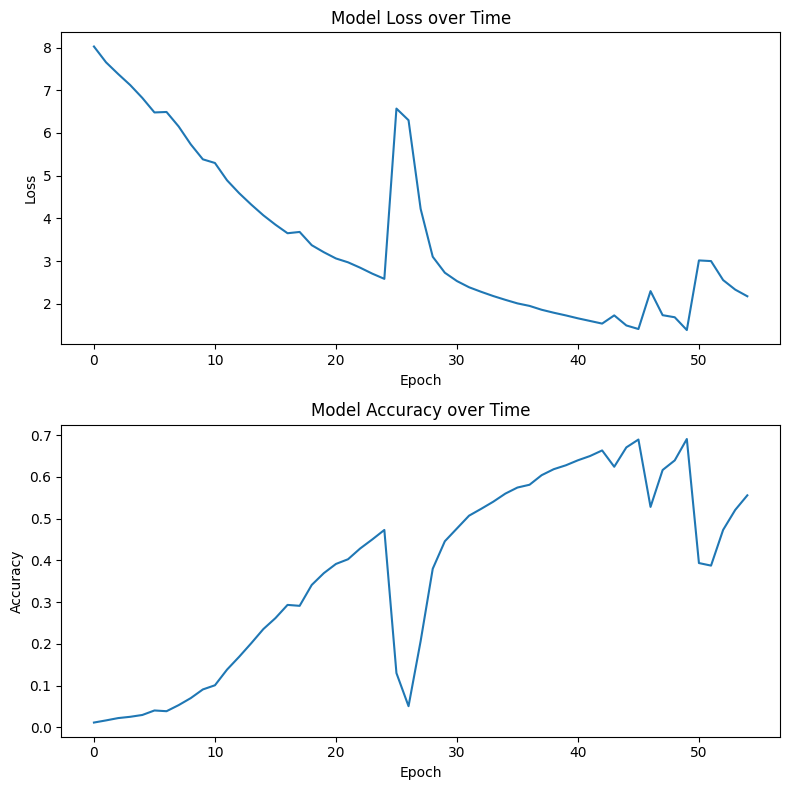

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the loss and accuracy values from the history object
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot the loss values on the first subplot
ax1.plot(range(len(loss)), loss)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Model Loss over Time')

# Plot the accuracy values on the second subplot
ax2.plot(range(len(accuracy)), accuracy)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Model Accuracy over Time')

# Adjust the spacing between the subplots
fig.tight_layout()

# Display the plot
plt.show()

In [ ]:
test_text='너는 사랑따윈'

In [ ]:
tokens=tk.texts_to_sequences([test_text])[0]

In [ ]:
tokens=pad_sequences([tokens],maxlen=max([len(_) for _ in seqData])-1)

In [ ]:
tokens.shape

(1, 318)

In [ ]:
# 예측을 위해 모델에 predict시킴
predicted=np.argmax(model.predict(tokens),axis=1)
predicted

1/1 [==============================] - 0s 23ms/step


array([541])

In [ ]:
pred=model.predict(tokens)

1/1 [==============================] - 0s 23ms/step


In [ ]:
pred.shape

(1, 4300)

In [ ]:
tk.word_index

{'내': 1,
 'you': 2,
 '널': 3,
 '난': 4,
 '수': 5,
 '나': 6,
 '너를': 7,
 '너의': 8,
 'i': 9,
 '그': 10,
 'me': 11,
 '나를': 12,
 '내가': 13,
 '날': 14,
 '내게': 15,
 '없어': 16,
 'love': 17,
 '나의': 18,
 '너': 19,
 '이제': 20,
 '바래': 21,
 '니가': 22,
 '더': 23,
 '다': 24,
 "i'm": 25,
 '이': 26,
 '이젠': 27,
 '사랑을': 28,
 '없는': 29,
 'getup': 30,
 '사랑': 31,
 '니': 32,
 '다시': 33,
 '우리': 34,
 'the': 35,
 '넌': 36,
 '왜': 37,
 '그대': 38,
 'oh': 39,
 '있는': 40,
 '너무': 41,
 '걸': 42,
 '정말': 43,
 '모두': 44,
 'and': 45,
 '그렇게': 46,
 '나는': 47,
 '거야': 48,
 '또': 49,
 '하지만': 50,
 'to': 51,
 'come': 52,
 'so': 53,
 '언제나': 54,
 'a': 55,
 'back': 56,
 '사랑해': 57,
 '제발': 58,
 '지금': 59,
 '네가': 60,
 '나도': 61,
 'yeah': 62,
 'it': 63,
 '있어': 64,
 '그대를': 65,
 '함께': 66,
 'my': 67,
 '이렇게': 68,
 'feel': 69,
 'on': 70,
 'be': 71,
 '모든': 72,
 '봐': 73,
 'can': 74,
 'your': 75,
 'call': 76,
 '마지막': 77,
 'baby': 78,
 '너와': 79,
 '얼마나': 80,
 '너에게': 81,
 'get': 82,
 '없이': 83,
 '모든걸': 84,
 '영원히': 85,
 'in': 86,
 'gonna': 87,
 '다른': 88,
 '항상': 89,
 'sorry':